<font size="5"><b>Lecture 02: Image Basics (exercises)</b></font>

In [1]:
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np

In [2]:
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

## EX1: open image

<div class="alert alert-success">
    <b>1.</b> Open the image 'Popocatepetl_HD.jpg' located the subfolder /images, using various libraries: <a href="https://scikit-image.org/docs/0.8.0/api/skimage.io.html#skimage.io.imread" target="_blank">scikit-image</a>, 
    <a href="https://matplotlib.org/3.3.4/api/_as_gen/matplotlib.pyplot.imread.html" target="_blank">matplotlib</a>, 
    <a href="https://pillow.readthedocs.io/en/stable/reference/Image.html" target="_blank">PIL</a>, 
    <a href="https://imageio.readthedocs.io/en/v2.16.1/_autosummary/imageio.imread.html" target="_blank">imageio</a>. 
    <br>
    Notice any difference (what variable type is returned)?
</div>

## EX2: get image charactaristics

<div class="alert alert-success">
    <b>2.</b> Find image characteristics:<br> 
    - what data type does it contain?<br> 
    - how many bands?<br> 
    - image size width/height? 
</div>

## EX3: plot image

<div class="alert alert-success">
    <b>3.</b> Plot image using matplotlib. Add axis labels and title.<br>
    <u>Hint</u>: use matplotlib's <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html" target="_blank">pyplot.imshow()</a> function<br>
</div>

## EX4: plot individual bands, play with colormaps

<div class="alert alert-success">
    <b>4.</b> Unpack the Red, Green, and Blue bands from the 3D array, and plot in seperate plots.
</div>

<div class="alert alert-success">
    <b>4 bis.</b> Play with the colormap:<br>
    - test various <a href="https://matplotlib.org/stable/tutorials/colors/colormaps.html" target="_blank" rel="noopener noreferrer">matplotlib's colormaps</a> using the option 'cmap' in pyplot.imshow(). Try adding '_r' to the name of the colormap used.<br>
    - add the colorbar using plt.colorbar()<br>
    - try options 'vmin' and 'vmax'
</div>

## EX5: crop image

<div class="alert alert-success">
    <b>5.</b> Crop image to see only summit and ash plume
    (<u>Hint</u>: use numpy array "slicing")<br>
    Save the resulting image using <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imsave.html" target="_blank" rel="noopener noreferrer">plt.imsave()</a>
</div>

<div class="alert alert-success">
    <b>5 bis.</b> Get the RGB values of the blue sky (take the top-left pixel in the image) and the grass (bottom-left pixel).<br>
</div>

## EX6: plot crop box on image

<div class="alert alert-success">
    <b>6.</b> Plot the cropped region as a red rectangle on full resolution image.<br>
    <u>Hint</u>: use matplotlib's <a href="https://matplotlib.org/stable/api/patches_api.html" target="_blank">patches</a> module 
</div>

<div class="alert alert-success">
    <b>6-bis.</b> Plot full resolution + crop box in one subplot, and the zoomed image in a second subplot.<br>
    <u>Hint</u>: use matplotlib's pyplot.subplots() function
</div>

## EX7: plot histogram

<div class="alert alert-success">
    <b>7.</b> Plot histogram of the red, green, and blue bands on a single plot.<br>
    <u>Hint</u>: use matplotlib's <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html?highlight=hist#matplotlib.pyplot.hist" target="_blank">pyplot.hist()</a> function
</div>

## EX8: convert image to grayscale

<div class="alert alert-success">
    <b>8.</b> Convert the color image to grayscale and plot.<br>
    1. try an equally weighted mean of the R,G,B bands. Is this satisfying?<br>
    2. try a weighted mean of the R,G,B bands, using a linear combination to approximate the luminance: Y = 0.2126*R + 0.7152*G + .0722 B. Is more satisfying?<br>
    3. try using scikit-image  
    <a href="https://scikit-image.org/docs/dev/api/skimage.color.html" target="_blank" rel="noopener noreferrer">color.rgb2gray()</a> function<br>
    <br>
    <b>8 bis.</b> Notice what happens to the data type? Plot a histogram of the grayscale image.
</div>

## EX9: plot pixel values across image profile

<div class="alert alert-success">
    <b>09.</b> Plot a profile going through image, horizontally across the ash plume.<br>
</div>

## EX10: segment from colors

<div class="alert alert-success">
    <b>10.</b> Turn the sky red!<br>
    <ol>
        <li> Crop a portion of the sky and analyze the histograms of the three bands.</li>
        <li> Create a mask to isolate the sky pixels.<br>Use numpy's where() function with as many thresholds wanted, and assign 1 where conditions are True, 0 where conditions are false.<br>EX: mask = np.where((R < 150) & (G > 100) & (B > 200), 1, 0)<br>Plot the mask with a color bar to see if you are happy with the isolated pixels.</li>
         <li> Create new bands R_f, G_f and B_f, altering the pixel color to red (R=255, G=0, B=0) where mask=1.<br>Use numpy's where() function to create these new bands.</li>
         <li> Plot the resulting image. Is your sky red?</li>
    </ol>
</div>

## EX11: change image brightness

<div class="alert alert-success">
    <b>11.</b> Change the brightness of the image (using HSV colorspace)<br>
    <ol>
        <li> Convert image to HSV</li>
        <li> Edit the Brightness</li>
         <li> Plot the modified image</li>
    </ol>
</div>

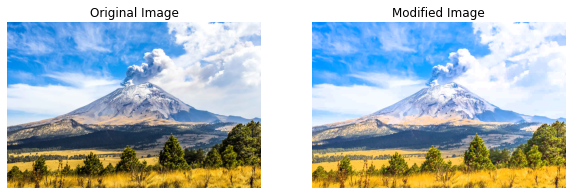

In [58]:
from skimage import io, color

img = io.imread(fname)

img_hsv = color.rgb2hsv(img)  # convert RGB image to HSV

# Change hue (color)
# hue_shift = 0.4  #
# img_hsv[:, :, 0] = (img_hsv[:, :, 0] + hue_shift) % 1.0

# Change brightness (adjust Value channel)
brightness_change = +0.2 
img_hsv[:, :, 2] = (img_hsv[:, :, 2] + brightness_change).clip(0, 1)

img_f = color.hsv2rgb(img_hsv)  # convert back to RGB for display

# Plot the original and modified images side by side
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

# Modified image
plt.subplot(1, 2, 2)
plt.imshow(img_f)
plt.title('Modified Image')
plt.axis('off')

plt.show()

<div class="alert alert-success">
    <b>11 bis.</b> Enhance colors by changing values of each band (using RGB colorspace).    
    <ol>
        <li> try shifting all channels in the image by 40%, and plot. Is this what you expected?</li>
        <li> try clamping the channels, so that you end up with values in the range 0-255 with data type uin8 (or in the range 0-1 with data type float).<br>Plot and compare with the original image.</li>
         <li> Create new bands R_f, G_f and B_f, altering the pixel color to red (R=255, G=0, B=0) where mask=1.<br>Use numpy's where() function to create these new bands.</li>
         <li> plot histograms of both the original and modified image. Explain.</li>
    </ol>
</div>

In [ ]:
# --- unpack channels, and check range/datatype
R, G, B = img[:, :, 0], img[:, :, 1], img[:, :, 2]

print(R.min(), R.max(), R.dtype)
print(G.min(), G.max(), G.dtype)
print(B.min(), B.max(), B.dtype)

0 255 uint8
0 255 uint8
0 255 uint8


In [ ]:
# --- enhance colors 

# ex: enchance all bands
R_f = R + R*.4 
G_f = G + G*.4 
B_f = B + B*.4 

# ex: enchance blue band
# R_f = R*1.0 #>> multiply by 1.0 to convert to float
# G_f = G*1.0 #>> multiply by 1.0 to convert to float
# B_f = B + B*.5 

print(R_f.min(), R_f.max(), R_f.dtype)
print(G_f.min(), G_f.max(), G_f.dtype)
print(B_f.min(), B_f.max(), B_f.dtype) #>> notice new value exceeds the 0-255 range

0.0 357.0 float64
0.0 357.0 float64
0.0 357.0 float64


In [ ]:
# --- stack filtered bands and plot resulting image
RGB_f = np.dstack((R_f, G_f, B_f))

print(RGB_f.shape)

(1252, 1920, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


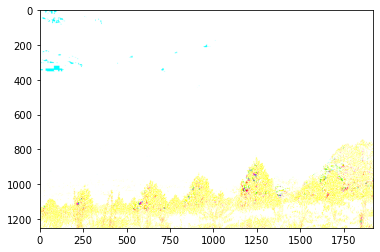

In [ ]:
# => result not as expected? 
# Notice the warning: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
plt.imshow(RGB_f)

In [ ]:
# --- clamp to the 0-255 range
# => we want to make sure the pixel values in the image stay between 0 and 255. 
# => implement clamping so that values<0 gets set to 0, and values>255 gets set to 255

R_f[R_f > 255] = 255
G_f[G_f > 255] = 255
B_f[B_f > 255] = 255

R_f[R_f < 0] = 0
G_f[G_f < 0] = 0
B_f[B_f < 0] = 0

print(R_f.min(), R_f.max(), R_f.dtype)
print(G_f.min(), G_f.max(), G_f.dtype)
print(B_f.min(), B_f.max(), B_f.dtype)

0.0 255.0 float64
0.0 255.0 float64
0.0 255.0 float64


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


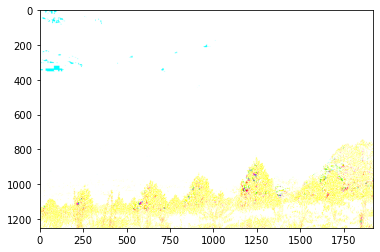

In [ ]:
# => still not? Because the data type is float, matplotlib expects it to map between 0-1
# => need to rescale to 0-1 and keep data type float, or convert data type to uint8
RGB_f = np.dstack((R_f, G_f, B_f))
plt.imshow(RGB_f)

In [ ]:
# RGB_f = np.dstack((R_f, G_f, B_f))
# RGB_f = np.uint8(RGB_f)
# print(RGB_f.dtype, RGB_f.min(), RGB_f.max())

In [ ]:
R_f = np.uint8(R_f)
G_f = np.uint8(G_f)
B_f = np.uint8(B_f)

RGB_f = np.dstack((R_f, G_f, B_f))

print(R_f.min(), R_f.max(), R_f.dtype)
print(G_f.min(), G_f.max(), G_f.dtype)
print(B_f.min(), B_f.max(), B_f.dtype)

0 255 uint8
0 255 uint8
0 255 uint8


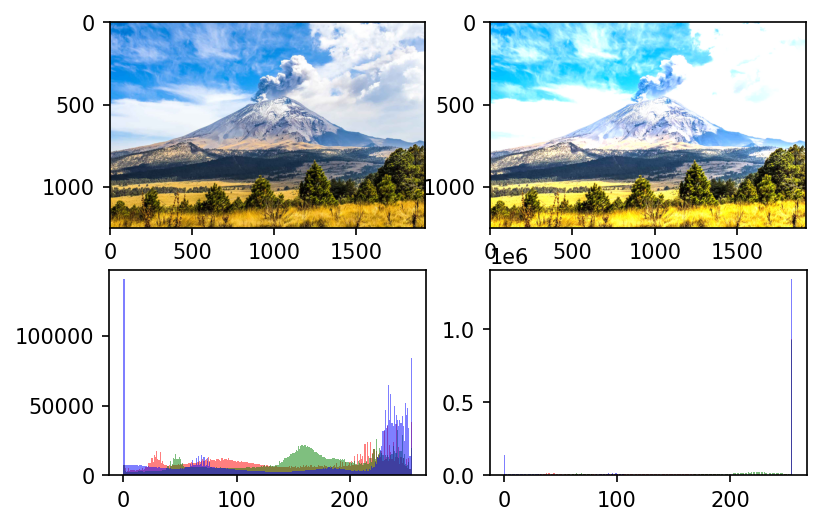

In [ ]:
plt.figure(dpi=150)
plt.subplot(221)
plt.imshow(img)
plt.subplot(222)
plt.imshow(RGB_f)

plt.subplot(223)
plt.hist(img[...,0].ravel(), bins=256, color='red', alpha=.5);
plt.hist(img[...,1].ravel(), bins=256, color='green', alpha=.5);
plt.hist(img[...,2].ravel(), bins=256, color='blue', alpha=.5);
plt.subplot(224) #>> notice peak at 255 => lots of pixels are clamped at 255 => saturated colors (when R,G,B=255 => white)
plt.hist(RGB_f[...,0].ravel(), bins=256, color='red', alpha=.5);
plt.hist(RGB_f[...,1].ravel(), bins=256, color='green', alpha=.5);
plt.hist(RGB_f[...,2].ravel(), bins=256, color='blue', alpha=.5);

## EX12: reduce the number of grayscale levels

<div class="alert alert-success">
    <b>12.</b> Reduce the number of colors used to 4 (=2 bits). Plot the histogram of the resulting image.<br>
    <u>Hint</u>: have a float image ranging between 0-1, and multiply by the number of wanted gray levels (remember value=0 counts as 1). Round the resulting image. Convert to range 0-255, and set to uint8 datatype.
</div>

In [ ]:
nbits = 2
nlevels = 2**nbits
print('number of gray levels = {}'.format(nlevels))

number of gray levels = 4


In [ ]:
img = io.imread(fname)

In [ ]:
# Convert to gray scale
img_g = color.rgb2gray(img)
print('min, max, gray values, dtype = {}, {}, {}, {}'.format(img_g.min(), img_g.max(), len(np.unique(img_g)), img_g.dtype))

min, max, gray values, dtype = 0.0, 1.0, 299005, float64


In [ ]:
# Create copy to modify
img_f = img_g.copy()

In [ ]:
#img_f = np.float64(img_f / img_f.max()) #>> in case image is uint8, should convert to float 0-1 first
img_f = img_f * (nlevels-1) #>> number of gray levels wanted; -1 because count starts at 0 => bin=0 counts as 1

In [ ]:
# https://www.kaggle.com/code/namanj27/numpy-image-processing-tutorial

# - 6. Color Reduction:
# Making Pixel values discrete by first division by // which gives int and then multiply by same factor
# img = np.array(Image.open('../input/-emma/emma_stone.jpg'))
# img_0 = (img // 64) * 64    
# img_1 = (img // 128) * 128

# - 11. Binarize image
# img = np.array(Image.open('../input/-emma/emma_stone.jpg'))
# img_64 = (img > 64) * 255
# img_128 = (img > 128) * 255

In [ ]:
# plt.hist(img_g.ravel());
# plt.hist(img_f.ravel());

In [ ]:
img_f = np.round(img_f) #>> the image now has 4 values, but range is outside 0-1, 0-255
print('min, max, gray values = {}, {}, {}'.format(img_f.min(), img_f.max(), np.unique(img_f)))

min, max, gray values = 0.0, 3.0, [0. 1. 2. 3.]


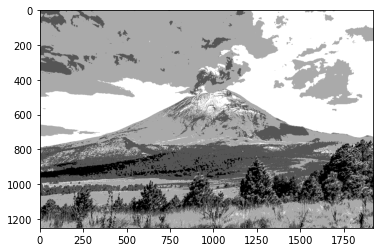

In [ ]:
plt.imshow(img_f, cmap='gray')

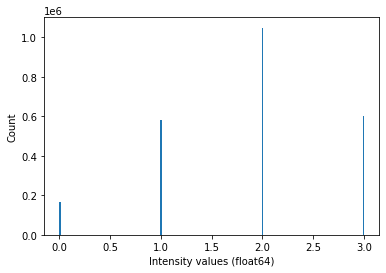

In [ ]:
plt.figure()
plt.hist(img_f.ravel(), bins=256);
plt.xlabel('Intensity values ({})'.format(img_g.dtype));
plt.ylabel('Count');

min, max, gray values = 0, 255, [  0  85 170 255]


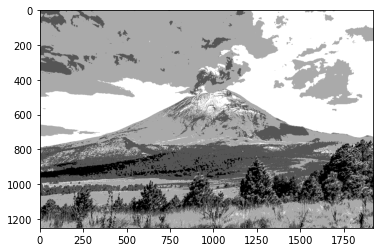

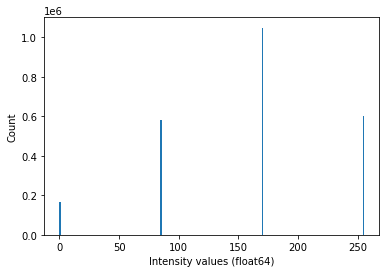

In [ ]:
img_f = np.uint8((img_f/img_f.max() * (2**8-1))) #>> (optional) convert to range between 0-255, and set uint8 datatype
print('min, max, gray values = {}, {}, {}'.format(img_f.min(), img_f.max(), np.unique(img_f)))

plt.figure()
plt.imshow(img_f, cmap='gray')

plt.figure()
plt.hist(img_f.ravel(), bins=256);
plt.xlabel('Intensity values ({})'.format(img_g.dtype));
plt.ylabel('Count');